In [490]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn

<b> Read Loan Application Data from CSV file </b>

In [491]:
loandata_df = pd.read_csv('Dataset/LoanApplicantData.csv')
loandata_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [492]:
loandata_df.shape

(614, 13)

<b> Drop Unnecessary features/columns </b>

In [493]:
loandata_df.drop(['Loan_ID', 'Education', 'Self_Employed'], 'columns', inplace=True)
loandata_df.head()

,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,6000,0.0,141.0,360.0,1.0,Urban,Y


<b> Verify if there are any NULL values are present in the dataset or not <b>

In [494]:
loandata_df[loandata_df.isnull().any(axis=1)].count()

Gender                96
Married              106
Dependents            94
ApplicantIncome      109
CoapplicantIncome    109
LoanAmount            87
Loan_Amount_Term      95
Credit_History        59
Property_Area        109
Loan_Status          109
dtype: int64

<b> Drop all the NULL values </b>

In [495]:
loandata_df = loandata_df.dropna()

In [496]:
loandata_df.shape

(505, 10)

In [497]:
loandata_df[loandata_df.isnull().any(axis=1)].count()

Gender               0
Married              0
Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [498]:
loandata_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,5411.427723,1562.978059,144.566337,341.869307,0.859406
std,6127.874416,2564.980770,81.306177,64.900341,0.347947
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,5818.000000,2253.000000,167.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Visualizing feature relationships

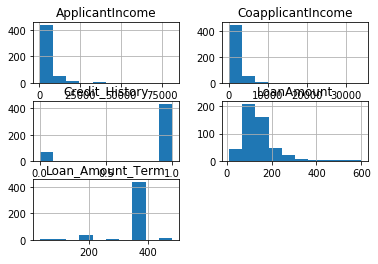

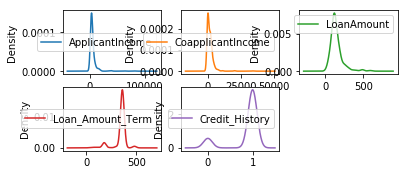

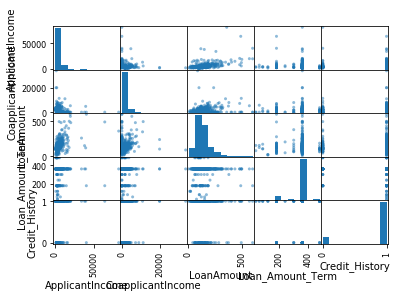

In [515]:
loandata_df.hist()
plt.show()

loandata_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(loandata_df)
plt.show()

In [ ]:
pd.crosstab(loandata_df['Gender'], loandata_df['Loan_Status'])

<b> Check the correlations amoung the features <b>

In [ ]:
loandata_df_corr = loandata_df.corr()
loandata_df_corr

<b> Check the heatmap (corellations) using seaborn package <b>

In [ ]:
sn.heatmap(loandata_df_corr, annot=True)

# Pre-Processing Stage

In [ ]:
from sklearn import preprocessing

<b> Make categorical data to be numerical <b>

In [ ]:
label_encoding = preprocessing.LabelEncoder()
loandata_df['Gender'] = label_encoding.fit_transform(loandata_df['Gender'].astype(str))
loandata_df['Married'] = label_encoding.fit_transform(loandata_df['Married'].astype(str))
#loandata_df['Self_Employed'] = label_encoding.fit_transform(loandata_df['Self_Employed'].astype(str))
loandata_df['Loan_Status'] = label_encoding.fit_transform(loandata_df['Loan_Status'].astype(str))

loandata_df.head()

<b> Make ordinal data to be numerical </b>

In [ ]:
loandata_df = pd.get_dummies(loandata_df, columns=['Property_Area', 'Dependents'])

loandata_df.head()

<b> Note: As a best practise, we need to reshuffle the data which we modified </b>

In [ ]:
loandata_df = loandata_df.sample(frac=1).reset_index(drop=True)

loandata_df.head()

<b> Save the processed data into a file, this will help as input to multiple classifiers </b>

In [ ]:
loandata_df.to_csv('Dataset/Cleaned_Processed.csv', index=False)

In [ ]:
loandata_df = pd.read_csv('Dataset/Cleaned_Processed.csv')

loandata_df.head()

# Training and Prediction Stage

In [ ]:
loandata_df.shape

<b> Train the model </b>

In [ ]:
from sklearn.model_selection import train_test_split

X = loandata_df.drop('Loan_Status', axis=1)
Y = loandata_df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

<b> Apply the classifier (LogisticRegression) </b>

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [ ]:
y_predict = logistic_model.predict(x_test)

In [ ]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})

In [ ]:
pred_results.head()

<b> Check the accuracy, precision and recall scores <b>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)

<b> Manual test the above accuracy, precision and recall which learned in DM class <b>

In [ ]:
loandata_crosstab = pd.crosstab(pred_results.y_predict, pred_results.y_test)

loandata_crosstab

In [ ]:
TP = loandata_crosstab[1][1]
TN = loandata_crosstab[0][0]
FP = loandata_crosstab[0][1]
FN = loandata_crosstab[1][0]

In [ ]:
manual_accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

manual_accuracy_score_verified

In [ ]:
manual_precision_score_loan_status = TP / (TP + FP)

manual_precision_score_loan_status

In [ ]:
manual_recall_score_loan_status = TP / (TP + FN)

manual_recall_score_loan_status

<b> Compare accuracy, precision and recall of MANUAL with scikit-learn values <b>

In [ ]:
print('Accuracy Score is--->:', accuracy)
print('Manual Accuracy Score is--->:', manual_accuracy_score_verified)

print('Precision Score is--->:', precision)
print('Manual Precision Score is--->:', manual_precision_score_loan_status)

print('Recall Score is--->:', recall)
print('Manual Recall Score is--->:', manual_recall_score_loan_status)

<b>Apply the classifier (DecisionTreeRegression)<b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

logistic_model = DecisionTreeClassifier(max_depth=None, max_features=None).fit(x_train, y_train)
y_predict = logistic_model.predict(x_test)
pred_results = pd.DataFrame({'y_test': y_test, 'y_predict': y_predict})
pred_results.head()

<b> Check the accuracy, precision and recall scores <b>

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)

<b>Manual test the above accuracy, precision and recall which learned in DM class <b>

In [ ]:
loandata_crosstab = pd.crosstab(pred_results.y_predict, pred_results.y_test)

loandata_crosstab

In [ ]:
TP = loandata_crosstab[1][1]
TN = loandata_crosstab[0][0]
FP = loandata_crosstab[0][1]
FN = loandata_crosstab[1][0]

In [ ]:
manual_accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

manual_accuracy_score_verified
manual_precision_score_loan_status = TP / (TP + FP)

manual_precision_score_loan_status
manual_recall_score_loan_status = TP / (TP + FN)

manual_recall_score_loan_status

<b>Compare accuracy, precision and recall of MANUAL with scikit-learn values <b>

In [ ]:
print('Accuracy Score is--->:', accuracy)
print('Manual Accuracy Score is--->:', manual_accuracy_score_verified)

print('Precision Score is--->:', precision)
print('Manual Precision Score is--->:', manual_precision_score_loan_status)

print('Recall Score is--->:', recall)
print('Manual Recall Score is--->:', manual_recall_score_loan_status)